### Use the ux_2D and uy_2D in pressure to draw streamlines

In [50]:
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, CUT=4, N=512):
    """A helper function that performs lowpass filtering."""
    T = 1           # Sample Period
    fs = N        # Sample rate, Hz (should be the xarray size)
    cutoff = CUT    # desired cutoff frequency of the filter, Hz
    nyq = 0.5 * fs  # Nyquist Frequency
    order = 4       # sin wave can be approximately represented as quadratic
    n = int(T * fs) # total number of samples
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [ ]:
"""Time averaging"""
fig = plt.figure(figsize=[4,3])
case = case1
ux_tmean = np.average(case.ux_2D, axis=0) # Time average of the 2D
uy_tmean = np.average(case.uy_2D, axis=0) # Time average of the 2D

# from mpl_toolkits.axes_grid1 import ImageGrid
# fig = plt.figure(figsize=(10,2))
# ax = plt.gca()
# grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
#                  nrows_ncols=(2,4),
#                  axes_pad=0.05,
#                  share_all=True,
#                  cbar_location="right",
#                  cbar_mode="single",
#                  cbar_size="3%",
#                  cbar_pad=0.05,
#                  )


"""u instantaneous"""
# img = plt.imshow(np.rot90(case.ux[0]/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 10, vmin = -10) 
# plt.title(r'$u_x(x,z,t)$')
"""u bar (time average)"""
img = plt.imshow(np.rot90(ux_tmean/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = 10, vmin = -10)
plt.title(r'$\bar{u}_x(x,z)$')
"""u prime"""
# img = plt.imshow(np.rot90(case.ux[0]/0.25)-np.rot90(ux_tmean/0.25), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 1, vmin = -1) 
# plt.title(r'$u_x^{\prime}(x,z,t)$')

ux_txmean = np.tile(np.average(ux_tmean, axis=0), (case.N,1)) # axis 0 is x, axis 1 is z
uy_txmean = np.tile(np.average(uy_tmean, axis=0), (case.N,1))

"""<u bar>"""
# img = plt.imshow(np.rot90(ux_txmean)/0.25, cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 10, vmin = -10) 
# plt.title(r'$\langle\bar{u}_x\rangle(z)$')

"""u tilde"""
# img = plt.imshow(np.rot90(ux_tmean - ux_txmean)/0.25, cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
#                  vmax = 1, vmin = -1) 
# plt.title(r'$\tilde{u}_x(x,z)$')

plt.axis('off')
L0 = 2*np.pi; NGRID = 512
xarray = np.linspace(-L0/2.,L0/2.,NGRID,endpoint=False)+L0/2**NGRID/2
plt.plot(xarray, np.average(case.phase['eta'][0],axis=0), c='k', lw=1)

In [80]:
case = case4
case.uxmean = np.average(case.ux_2D, axis=(0))
case.yarray = np.linspace(-1,case.L0-1,case.N,endpoint=False)+case.L0/2**case.N/2

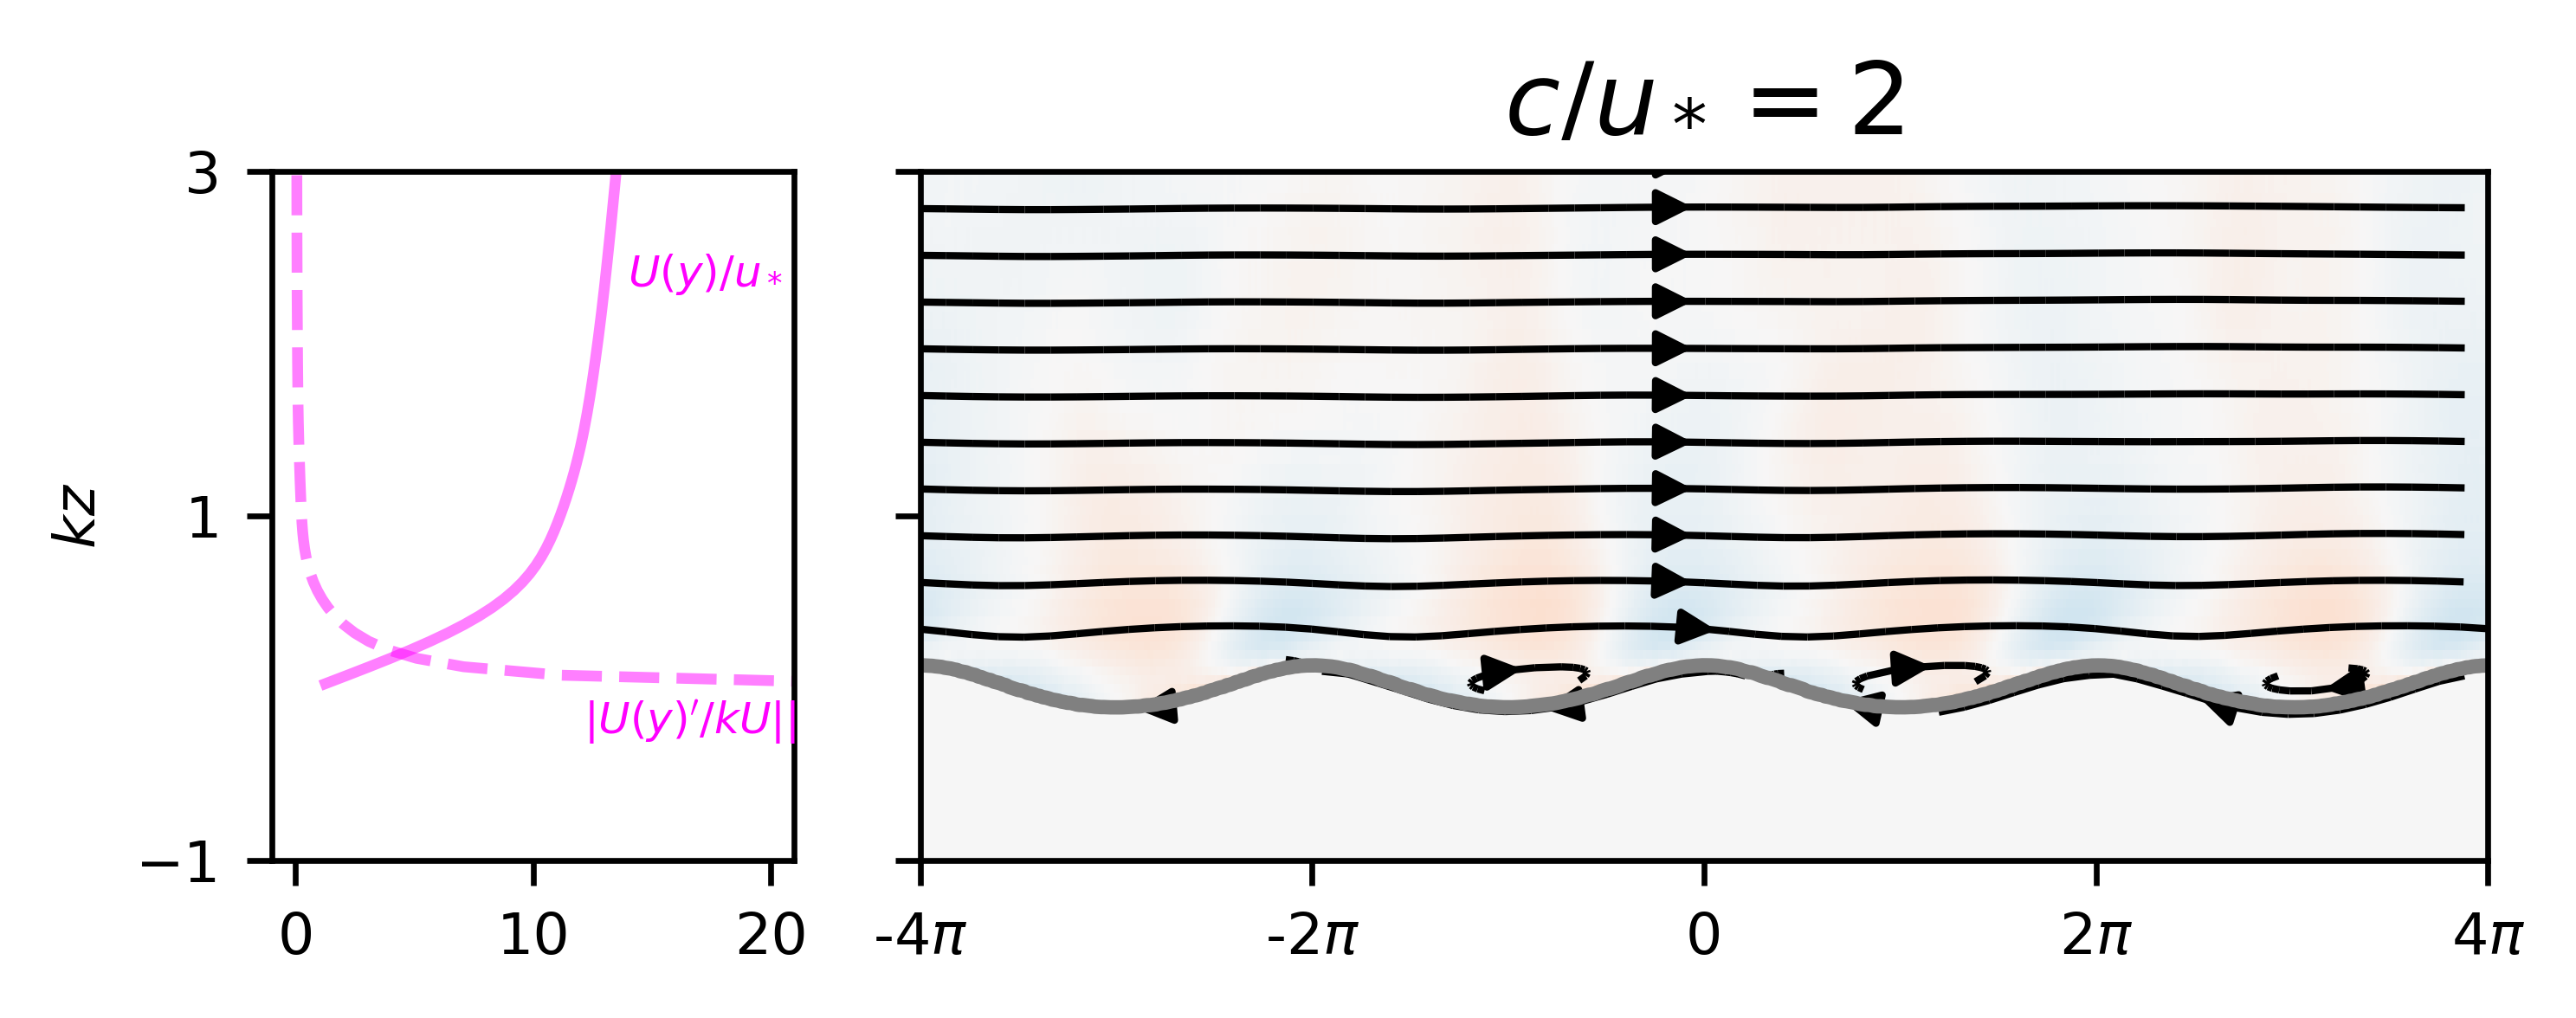

In [81]:
""" Draw mean side by side with streamlines """
figure, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,3]}, 
                                  sharey=True, figsize=[5,2])

""" Mean profile """
def draw_gradient (case, cchoice, ax):
    start = 82
    ux_simu = (np.average(case.uxmean, axis=0)[start:-1])/case.ustar
    ux_smooth = butter_lowpass_filter(ux_simu, CUT=32, N=512)
    ytau = 1
    ax.plot(ux_smooth,case.yarray[start:-1]*case.k, color=cchoice, alpha=0.5)
    quant = np.gradient(ux_smooth)/(case.L0/case.N)/(ux_smooth-case.wave.c)/case.k
    ax.plot(quant, case.yarray[start:-1]*case.k, '--', color=cchoice, alpha = 0.5)
#     ax.plot((case.yarray[start:-1]-1)*case.k/case.ustar, case.yarray[start:-1]/ytau, color='gray', alpha=0.5)
#     plt.plot((case.yarray[start:-1]-1)/ytau, np.gradient(ux_smooth)/(case.L0/case.N)/5)

ax0.text(0.8, 0.2, r'$|U(y)^{\prime}/kU||$', ha='center', va='center', fontsize=6, c='magenta', transform=ax0.transAxes)
ax0.text(0.83, 0.85, r'$U(y)/u_*$', ha='center', va='center', fontsize=6, color='magenta', transform=ax0.transAxes)
ax0.set_ylabel('$kz$')
ax0.set_xlim([-1, 21])
draw_gradient(case, cchoice = 'magenta', ax=ax0)

""" Streamlines """
# img = ax1.imshow(np.rot90(uy_phase_aver/0.25), cmap='RdBu', extent=[-2,2,-1/wavelen,(2*np.pi-1)/wavelen],
#                  vmax = 1, vmin = -1, aspect='auto')
# ax1.streamplot(X[0:trunc,:], Y[0:trunc,:], np.rot90(ux_phase_aver,3)[0:trunc,:], np.rot90(-uy_phase_aver,3)[0:trunc,:], 
#                density=[10,1.5], linewidth=1, color='k')
# ax1.plot(xarray, np.roll((np.average(case.phase['eta'][0], axis=0)-1)/wavelen, -case.phase['idx'][0], axis=0), c='gray', lw=2)
# ax1.set_xlim([-2,2]); ax1.set_ylim([-0.1,1.6])
# ax1.set_xlabel('$x/\lambda$')
# ax1.get_yaxis().set_visible(False)
# cbar = fig.colorbar(img, orientation="vertical", pad=0.01, ax=ax1)
# cbar.ax.text(0.5, 1.05, r'$\overline{w}/u_{*}$', ha='center', va='center', 
#              transform=cbar.ax.transAxes)
plot_streamline (case, ax1)
plt.tight_layout()

In [51]:
""" PROCESSING: Load the aux case file. """
def prep_1D (case):
    version = '_tiger'
    picklename = case.path + 'case' + version + '.pkl'
    case_aux = load_object(picklename)
    for j in range(0, np.size(case_aux.t)):
        case_aux.interface[j].stress(case_aux.tau0,case_aux.mu2)
    case.taunu_all = [np.roll(np.average(interface.tau_nux, axis=0), -(interface.idx), axis=0) for interface in case_aux.interface]

prep_1D (case1)
prep_1D (case2)
prep_1D (case3)
prep_1D (case4)
prep_1D (case5)
prep_1D (case6)
prep_1D (case7)
prep_1D (case9)
prep_1D (case11)

/home/jiarongw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


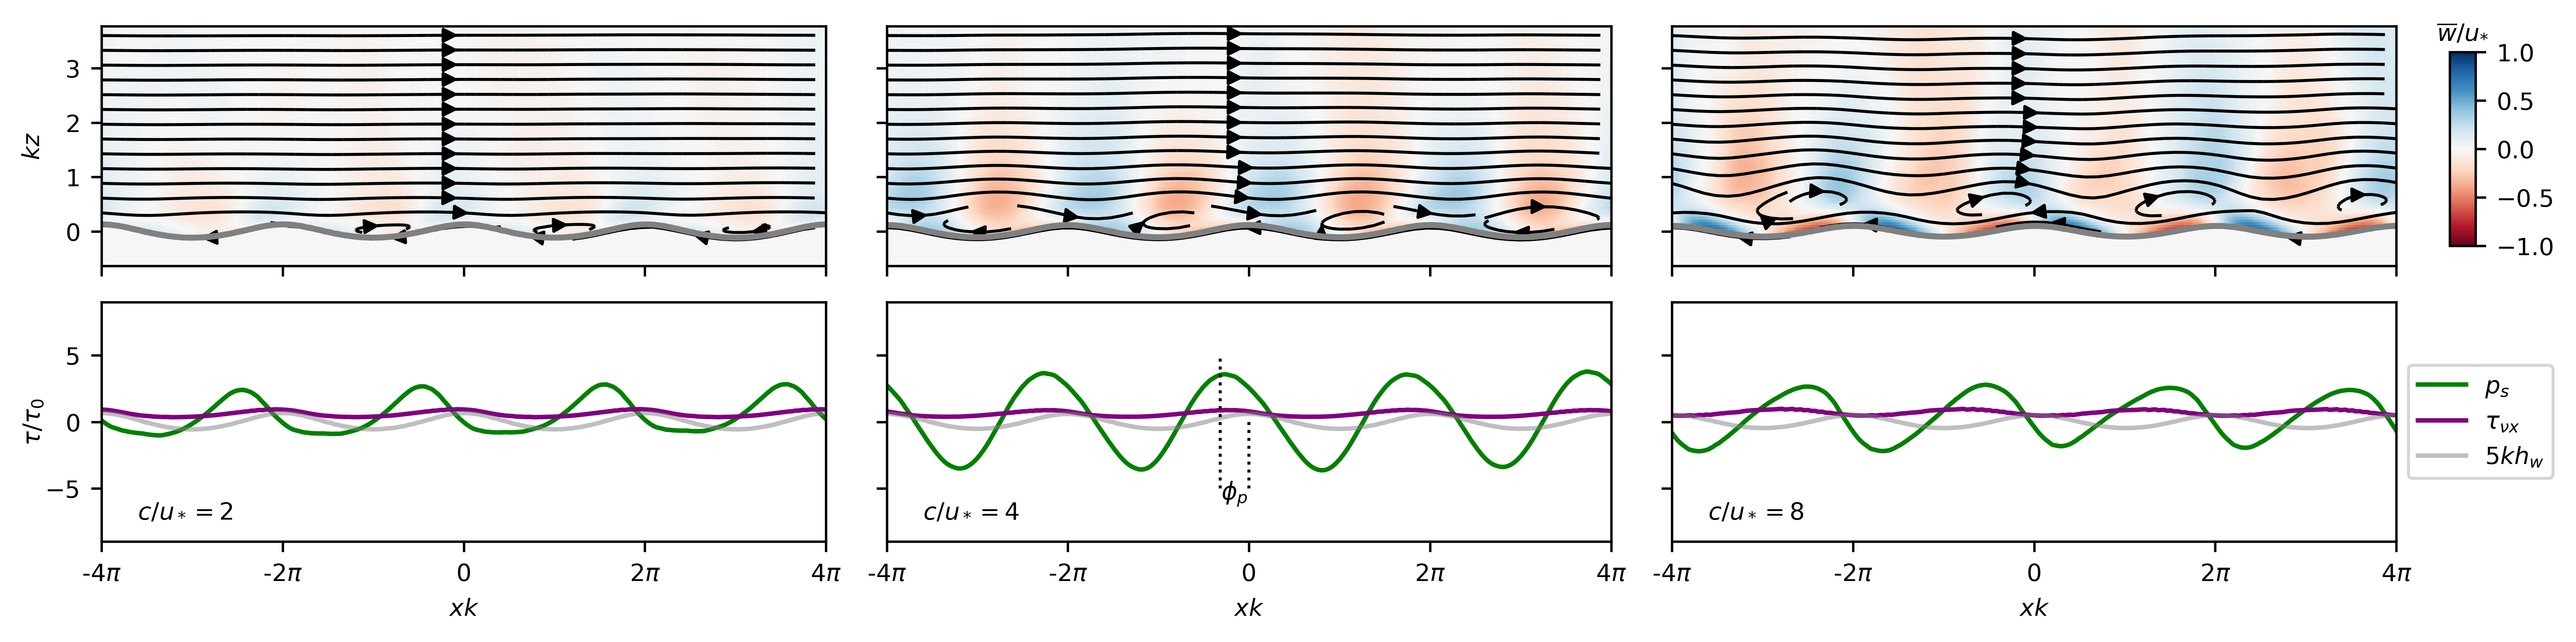

In [312]:
""" FIGURE: draw streamlines with underlying phase averaged vertical velocity. """
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, axes = plt.subplots(2, 3, sharey='row', sharex=True, figsize=[12,3], gridspec_kw={'height_ratios': [2,2]})

def plot_streamline (case, ax):
    ux_phase_aver = np.average((np.array(case.ux_2D) - case.wave.c)*(1-np.array(case.f_2D))**10, axis=0) 
    uy_phase_aver = np.average(np.array(case.uy_2D)*(1-np.array(case.f_2D))**10, axis=0)
    NGRID = 512; NSLICE = 256; L0 = 2*np.pi
    xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    yarray = (np.linspace(-1.,L0-1,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    X, Y = np.meshgrid(xarray, yarray)
    trunc = 160
    img = ax.imshow(np.rot90(uy_phase_aver/0.25), cmap='RdBu', extent=[-case.k*L0/2.,case.k*L0/2.,-1*case.k,(L0-1)*case.k],
                    vmax = 1, vmin = -1, aspect='auto')
    ax.streamplot(X[0:trunc,:], Y[0:trunc,:], np.rot90(ux_phase_aver,3)[0:trunc,:], np.rot90(-uy_phase_aver,3)[0:trunc,:], 
                  density=[2,1], linewidth=1, color='k')
    ax.plot(xarray, np.roll((np.average(case.phase['eta'][-1], axis=0)-1)*case.k, -case.phase['idx'][-1], axis=0), c='gray', lw=2)
    ax.xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
    ))
    ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
    ax.set_xlim([-4*np.pi,4*np.pi]); ax.set_ylim([-0.1*2*np.pi,0.6*2*np.pi])
    ax.get_yaxis().set_visible('False')
    return img
  
def plot_1D (case, ax):
    case.tau0 = case.rho2*case.ustar**2
    p2D_aver = np.average(case.p_2D, axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
    eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
    p2D_aver_interp, zgrid = array_newcoord(p2D_aver, case=case, eta=eta)

    xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    ax.plot(xarray, p2D_aver_interp[:,85]/case.tau0, c='green', label=r'$p_s$')
    ax.plot(xarray, np.average(case.taunu_all, axis=(0))/case.tau0, c='purple', label=r'$\tau_{\nu x}$')
    ax.plot(xarray, (eta)*case.k*5, c='gray', alpha=0.5, label=r'$5kh_w$')
    ax.set_xlabel(r'$xk$')
    ax.set_ylim([-9,9])
    ax.text(0.05, 0.1, r'$c/u_* = %.0f$' % (case.wave.c/case.ustar), transform=ax.transAxes)

# pcontour = plot_streamline (case1, axes[0,0])
# pcontour = plot_streamline (case2, axes[0,1])
# pcontour = plot_streamline (case3, axes[0,2])
# plot_1D (case1, axes[1,0])
# plot_1D (case2, axes[1,1])
# plot_1D (case3, axes[1,2])

pcontour = plot_streamline (case4, axes[0,0])
pcontour = plot_streamline (case5, axes[0,1])
pcontour = plot_streamline (case6, axes[0,2])
plot_1D (case4, axes[1,0])
plot_1D (case5, axes[1,1])
plot_1D (case6, axes[1,2])

# rect : This parameter is the dimensions [left, bottom, width, height] of the new axes.
# projection : This parameter is the projection type of the Axes.
cb_ax = fig.add_axes([0.95, 0.62, 0.01, 0.3])
cbar = fig.colorbar(img, orientation="vertical", cax=cb_ax)
cbar.ax.text(0.5, 1.1, r'$\overline{w}/u_{*}$', ha='center', va='center', transform=cbar.ax.transAxes)
axes[0,0].get_yaxis().set_visible('True')
axes[0,0].set_ylabel(r'$kz$', labelpad=7)
axes[1,0].set_ylabel(r'$\tau/\tau_0$', labelpad=0)
axes[1,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

""" Denote phi_p """
x = np.ones(20); tau1 = np.linspace(-5,0,20); tau2 = np.linspace(-5,5,20)
axes[1,1].plot(x*0, tau1, ':', c='k', lw=1)
axes[1,1].plot(x*(-1), tau2, ':', c='k', lw=1)
axes[1,1].text(0.48, 0.2, r'$\phi_p$', ha='center', va='center', rotation=0., fontsize=8, transform=axes[1,1].transAxes)
plt.tight_layout()
fig.savefig('figures/streamline_ak01.pdf', bbox_inches='tight', pad_inches=0.1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


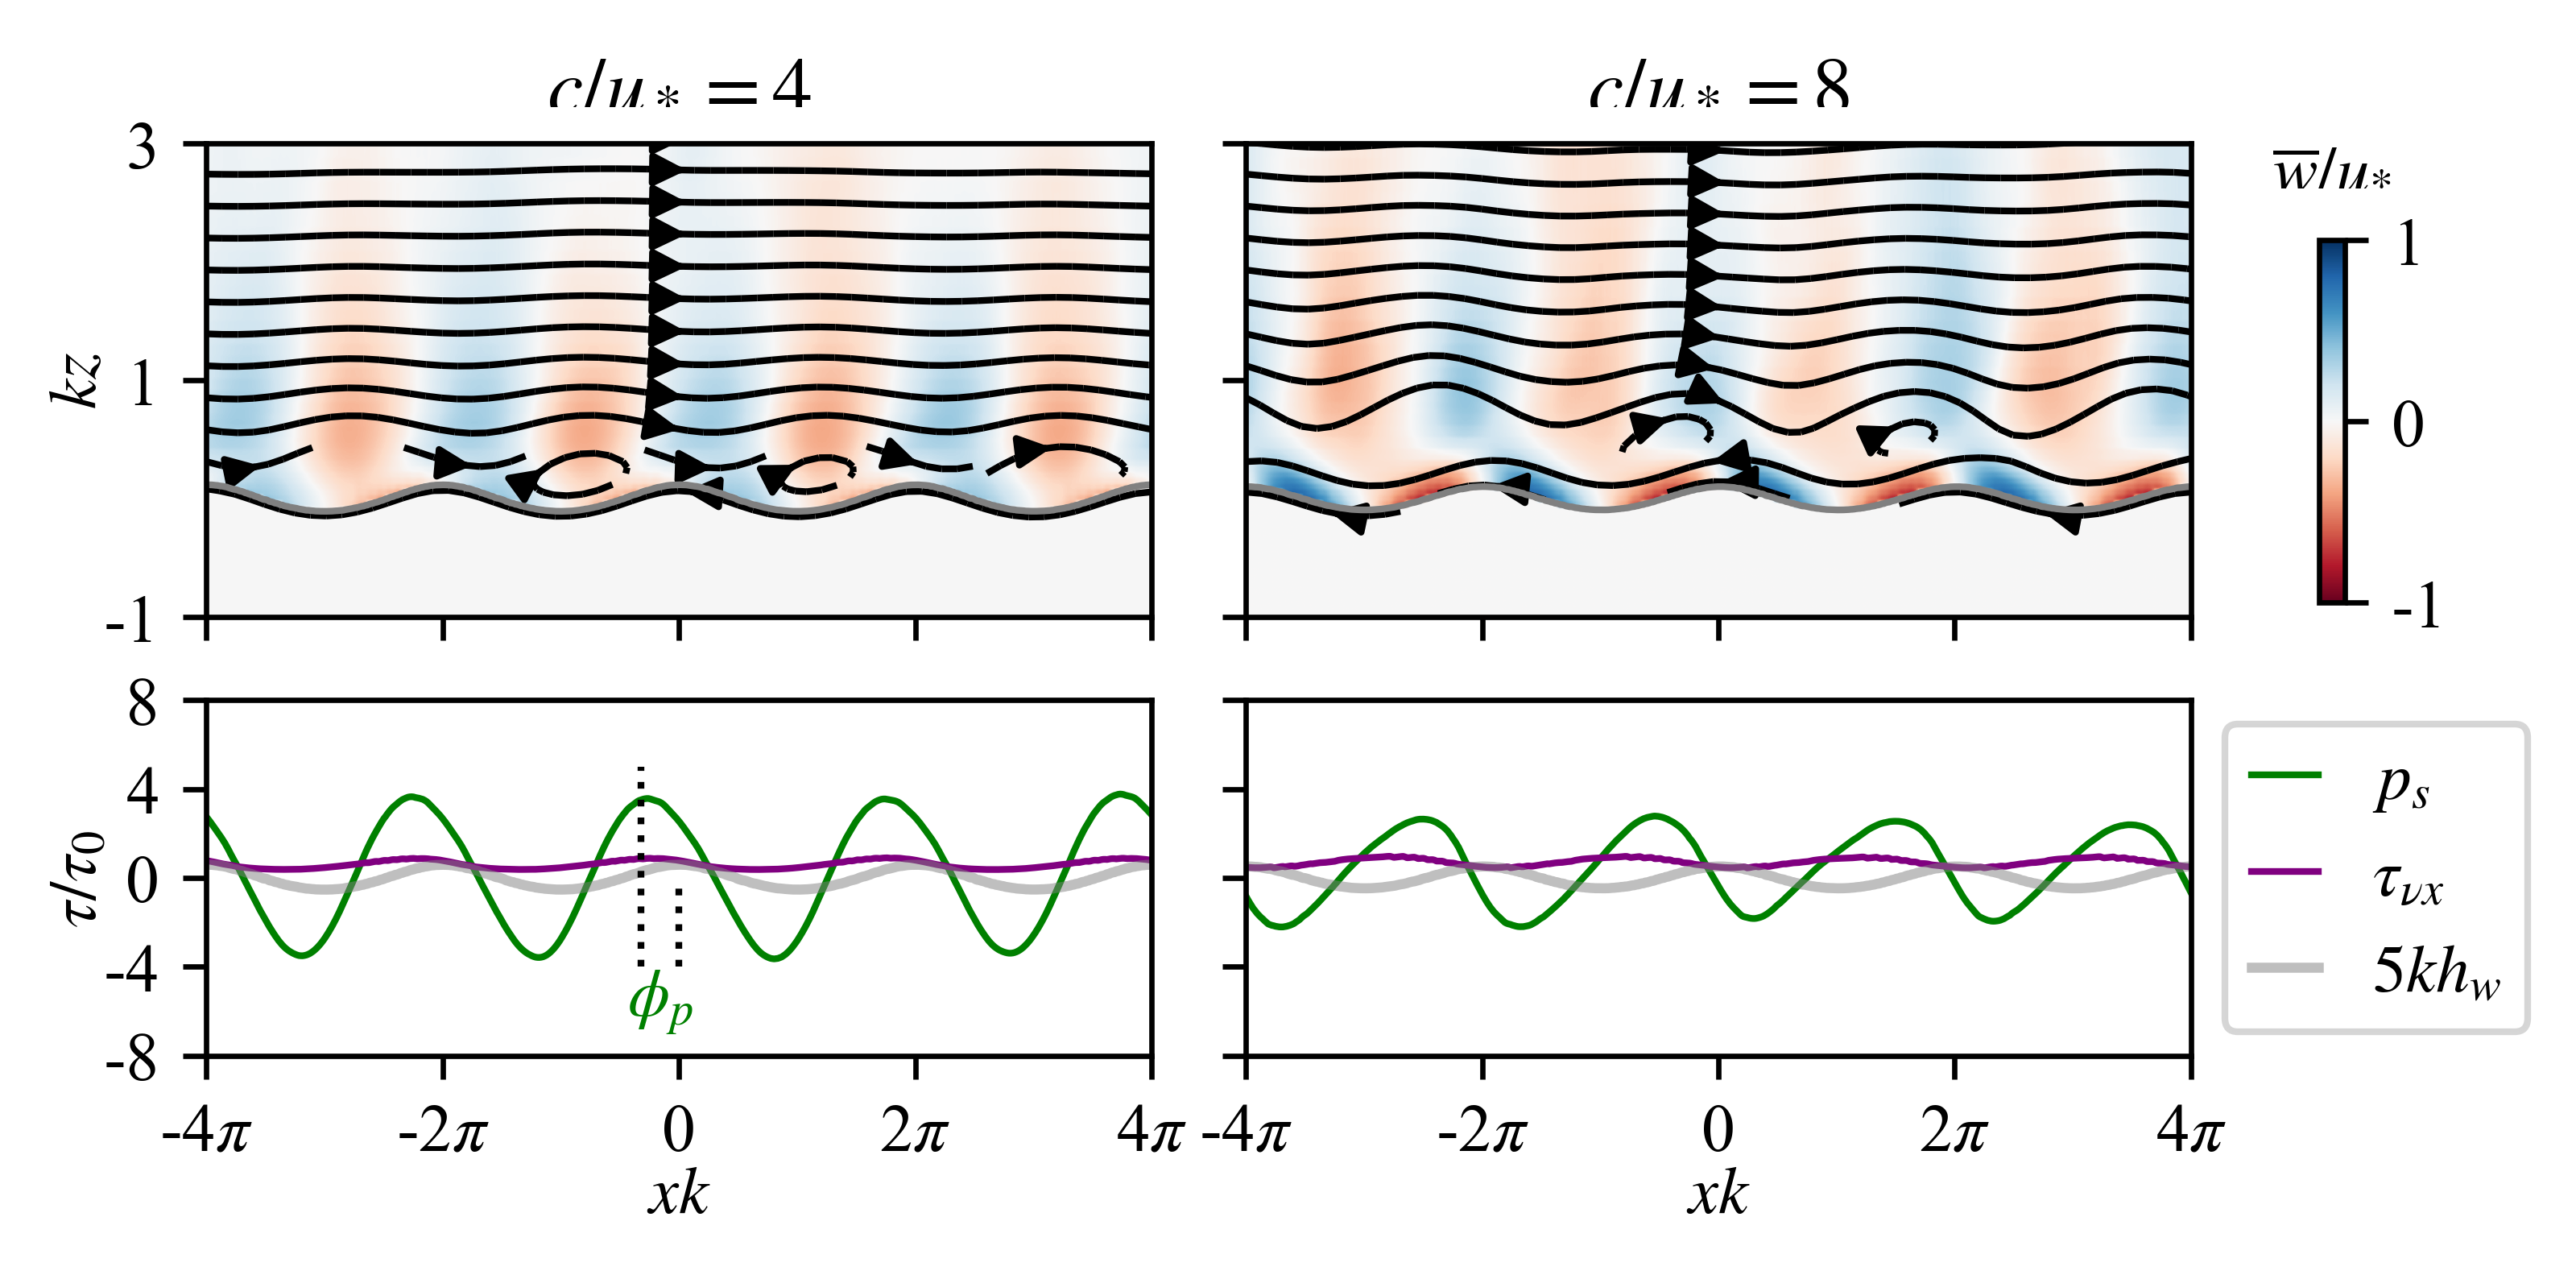

In [59]:
""" FIGURE: draw streamlines with underlying phase averaged vertical velocity. """
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, axes = plt.subplots(2, 2, sharey='row', sharex=True, figsize=[5.3,2.5], gridspec_kw={'height_ratios':[2,1.5], "wspace":0.1, "hspace":0.2})

def plot_streamline (case, ax):
    ux_phase_aver = np.average((np.array(case.ux_2D) - case.wave.c)*(1-np.array(case.f_2D))**10, axis=0) 
    uy_phase_aver = np.average(np.array(case.uy_2D)*(1-np.array(case.f_2D))**10, axis=0)
    NGRID = 512; NSLICE = 256; L0 = 2*np.pi
    xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    yarray = (np.linspace(-1.,L0-1,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    X, Y = np.meshgrid(xarray, yarray)
    trunc = 160
    img = ax.imshow(np.rot90(uy_phase_aver/0.25), cmap='RdBu', extent=[-case.k*L0/2.,case.k*L0/2.,-1*case.k,(L0-1)*case.k],
                    vmax = 1, vmin = -1, aspect='auto')
    ax.streamplot(X[0:trunc,:], Y[0:trunc,:], np.rot90(ux_phase_aver,3)[0:trunc,:], np.rot90(-uy_phase_aver,3)[0:trunc,:], 
                  density=[2,1], linewidth=1, color='k')
    ax.plot(xarray, np.roll((np.average(case.phase['eta'][-1], axis=0)-1)*case.k, -case.phase['idx'][-1], axis=0), c='gray', lw=1)
    ax.xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
    ))
    ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
    ax.set_xlim([-4*np.pi,4*np.pi]); ax.set_ylim([-1,3])
    ax.get_yaxis().set_visible('False')
    ax.set_yticks(np.arange(-1,4,2))
    ax.set_title(r'$c/u_*=%.0f$' %(case.wave.c/case.ustar))
    return img
  
def plot_1D (case, ax):
    L0 = 2*np.pi; NGRID = 512
    case.tau0 = case.rho2*case.ustar**2
    p2D_aver = np.average(case.p_2D, axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
    eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
    p2D_aver_interp, zgrid = array_newcoord(p2D_aver, case=case, eta=eta)

    xarray = (np.linspace(-L0/2.,L0/2.,NGRID,endpoint=True)+L0/2**NGRID/2)*case.k
    ax.plot(xarray, p2D_aver_interp[:,85]/case.tau0, c='green', label=r'$p_s$', lw=1)
    ax.plot(xarray, np.average(case.taunu_all, axis=(0))/case.tau0, c='purple', label=r'$\tau_{\nu x}$', lw=1)
    ax.plot(xarray, (eta)*case.k*5, c='gray', alpha=0.5, label=r'$5kh_w$')
    ax.set_ylim([-8,8])
    ax.set_yticks(np.arange(-8,12,4))
#     ax.text(0.05, 0.1, r'$c/u_* = %.0f$' % (case.wave.c/case.ustar), transform=ax.transAxes)


# pcontour = plot_streamline (case4, axes[0,0])
pcontour = plot_streamline (case5, axes[0,0])
pcontour = plot_streamline (case6, axes[0,1])
plot_1D (case5, axes[1,0])
plot_1D (case6, axes[1,1])


# rect : This parameter is the dimensions [left, bottom, width, height] of the new axes.
# projection : This parameter is the projection type of the Axes.
cb_ax = fig.add_axes([0.95, 0.5, 0.01, 0.3])
v1 = np.linspace(-1, 1, 3, endpoint=True)
cbar = fig.colorbar(pcontour, orientation="vertical", cax=cb_ax, ticks=v1)
cbar.ax.text(0.5, 1.2, r'$\overline{w}/u_{*}$', ha='center', va='center', transform=cbar.ax.transAxes)

axes[0,0].get_yaxis().set_visible('True')
axes[0,0].set_ylabel(r'$kz$', labelpad=-1)
axes[1,0].set_ylabel(r'$\tau/\tau_0$', labelpad=-1)
axes[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5), handlelength=1)
axes[1,0].set_xlabel(r'$xk$',labelpad=0)
axes[1,1].set_xlabel(r'$xk$',labelpad=0)


""" Denote phi_p """
x = np.ones(20); tau1 = np.linspace(-4,0,20); tau2 = np.linspace(-4,5,20)
axes[1,0].plot(x*0, tau1, ':', c='k', lw=1)
axes[1,0].plot(x*(-1), tau2, ':', c='k', lw=1)
axes[1,0].text(0.48, 0.15, r'$\phi_p$', c='green', ha='center', va='center', rotation=0., transform=axes[1,0].transAxes)
# fig.tight_layout()
# fig.savefig('figures/streamline_ak01.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/streamline_ak01.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/streamline_ak01.eps', bbox_inches='tight', pad_inches=0.1)

In [ ]:
""" CHECK: whether the stress add up to 1. """
version = '_tiger'
fig = plt.figure(figsize=[4,2])
for case in (case2,case3,case4,case5,case6):
    picklename = case.path + 'case' + version + '.pkl'
    case_aux = load_object(picklename)
    for j in range(0, np.size(case_aux.t)):
        case_aux.interface[j].stress(case_aux.tau0,case_aux.mu2)
    shear_all = [interface.shear for interface in case_aux.interface]
    shear = np.average(shear_all)
    plt.plot(case.wave.c/case.ustar, shear/case.tau0, c=case.cc, marker='s', mfc='none', lw=0, markersize=3, alpha = 1)
    plt.plot(case.wave.c/case.ustar, case.Fp_aver/case.tau0, c=case.cc, marker='o', mfc='none', lw=0, markersize=3, alpha = 1)
    plt.plot(case.wave.c/case.ustar, (shear+case.Fp_aver)/case.tau0, c=case.cc, marker='x', mfc='none', lw=0, markersize=3, alpha = 1)

plt.xlabel(r'$c/u_*$')
plt.ylabel(r'$\tau/\rho_a u_*^2$')